# Impact of Indicator Type on Lifetime

In [1]:
# Import
import numpy as np
import pandas as pd 
from datetime import datetime
from datetime import timedelta
from IPython.display import HTML, display
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Disable warnings
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

# Color palette
sns.set_palette("rocket")

## Data Import

In [2]:
# Remove all rows without a last_seen_utc
urlData = pd.read_csv('.\Data\Threat_Fox\\threat_fox_urls.csv',sep=',', skipinitialspace=True)
urlData = urlData.loc[urlData["last_seen_utc"].notna()]

ipData = pd.read_csv('.\Data\Threat_Fox\\threat_fox_ip.csv',sep=',', skipinitialspace=True)
ipData = ipData.loc[ipData["last_seen_utc"].notna()]

hashData = pd.read_csv('.\Data\Threat_Fox\\threat_fox_md5.csv',sep=',', skipinitialspace=True)
hashData = hashData.loc[hashData["last_seen_utc"].notna()]

In [3]:
# Remove all rows where the indicator is younger than one year
present = datetime.now()
past = timedelta(days=31)
year = present - past

urlData["last_seen_utc"] = urlData["last_seen_utc"].apply(lambda x: pd.to_datetime(x))
urlData["first_seen_utc"] = urlData["first_seen_utc"].apply(lambda x: pd.to_datetime(x))
urlData = urlData[urlData["last_seen_utc"] < year]
urlData = urlData[urlData["last_seen_utc"] != urlData["first_seen_utc"]]

ipData["last_seen_utc"] = ipData["last_seen_utc"].apply(lambda x: pd.to_datetime(x))
ipData["first_seen_utc"] = ipData["first_seen_utc"].apply(lambda x: pd.to_datetime(x))
ipData = ipData[ipData["last_seen_utc"] < year]
ipData = ipData[ipData["last_seen_utc"] != ipData["first_seen_utc"]]

hashData["last_seen_utc"] = hashData["last_seen_utc"].apply(lambda x: pd.to_datetime(x))
hashData["first_seen_utc"] = hashData["first_seen_utc"].apply(lambda x: pd.to_datetime(x))
hashData = hashData[hashData["last_seen_utc"] < year]
hashData = hashData[hashData["last_seen_utc"] != hashData["first_seen_utc"]]

In [4]:
# Calculate lifetime and delete negative values
urlData['lifetimeHours'] = (urlData["last_seen_utc"] - urlData["first_seen_utc"]) / pd.Timedelta(hours=1)
urlData = urlData[urlData['lifetimeHours'] >= 0].dropna()

ipData['lifetimeHours'] = (ipData["last_seen_utc"] - ipData["first_seen_utc"]) / pd.Timedelta(hours=1)
ipData = ipData[ipData['lifetimeHours'] >= 0].dropna()

hashData['lifetimeHours'] = (hashData["last_seen_utc"] - hashData["first_seen_utc"]) / pd.Timedelta(hours=1)
hashData = hashData[hashData['lifetimeHours'] >= 0].dropna()

In [5]:
fullData = pd.concat([urlData, hashData, ipData], axis=0)
fullData.shape[0]

127448

## Mode and Mean

In [6]:
# Display information
average = [["Mean URL Lifetime",urlData.loc[:, 'lifetimeHours'].mean()], 
           ["Mode URL Lifetime",urlData.loc[:, 'lifetimeHours'].mode()[0]], 
           ["URL Dataset",urlData.shape[0]], 
           ["Mean IP Lifetime",ipData.loc[:, 'lifetimeHours'].mean()], 
           ["Mode IP Lifetime",ipData.loc[:, 'lifetimeHours'].mode()[0]],
           ["IP Dataset",ipData.shape[0]], 
           ["Mean Hash Lifetime",hashData.loc[:, 'lifetimeHours'].mean()],
           ["Mode Hash Lifetime",hashData.loc[:, 'lifetimeHours'].mode()[0]],
           ["Hash Dataset",hashData.shape[0]]]

display(HTML(
   "<table><tr>{}</tr></table>".format(
       "</tr><tr>".join(
           "<td>{}</td>".format("</td><td>".join(str(_) for _ in row)) for row in average))
))

Mean URL Lifetime,158.81727391567802
Mode URL Lifetime,0.006944444444444444
URL Dataset,87100
Mean IP Lifetime,3128.9092610565563
Mode IP Lifetime,0.37222222222222223
IP Dataset,39308
Mean Hash Lifetime,79.75546073717949
Mode Hash Lifetime,0.002777777777777778
Hash Dataset,1040


## Visualization

### URL

<Axes: >

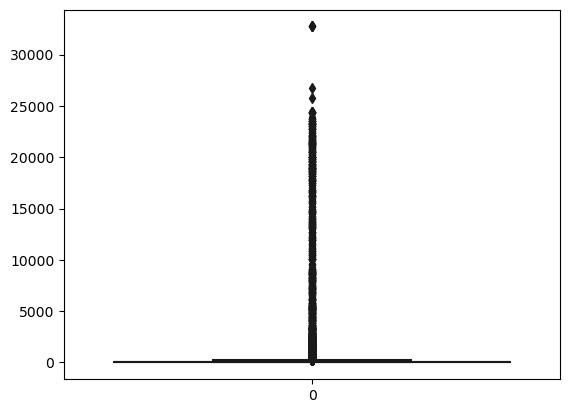

In [7]:
urlData = urlData.reset_index()
sns.boxplot(urlData["lifetimeHours"])

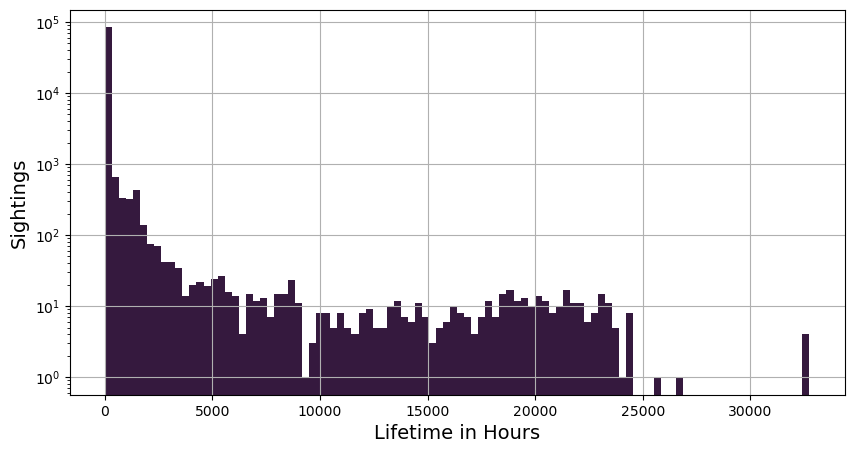

In [19]:
# Dispay as logarithmic histogram 
plt.xlabel("Lifetime in Hours", fontsize=14)
plt.ylabel("Sightings", fontsize=14)
urlData["lifetimeHours"].hist(bins=100, figsize=(10,5), log=True)
plt.savefig("ioC_URL.svg",bbox_inches='tight')

### IP

<Axes: >

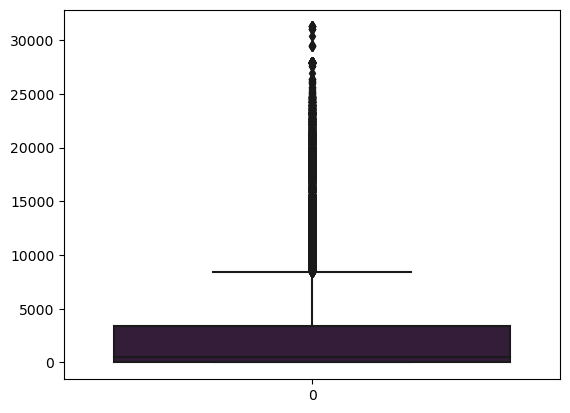

In [9]:
ipData = ipData.reset_index()
sns.boxplot(ipData["lifetimeHours"])

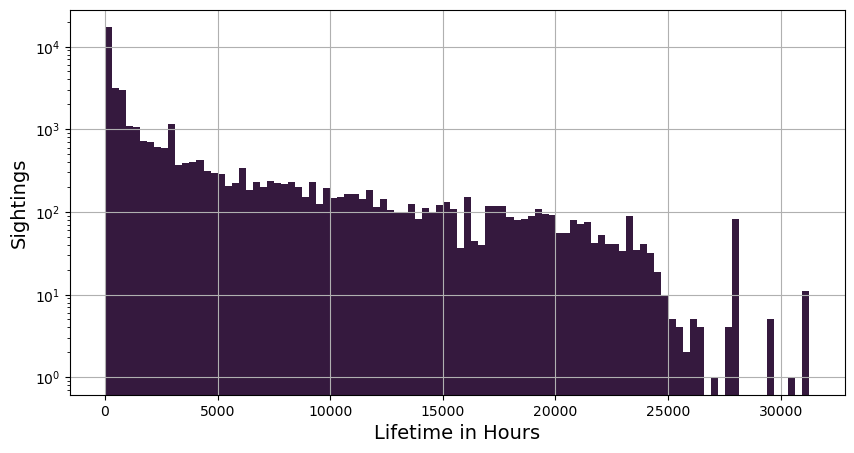

In [18]:
# Dispay as logarithmic histogram 
plt.xlabel("Lifetime in Hours", fontsize=14)
plt.ylabel("Sightings", fontsize=14)
ipData["lifetimeHours"].hist(bins=100, figsize=(10,5), log=True)
plt.savefig("ioC_IP.svg",bbox_inches='tight')

### Hash

<Axes: >

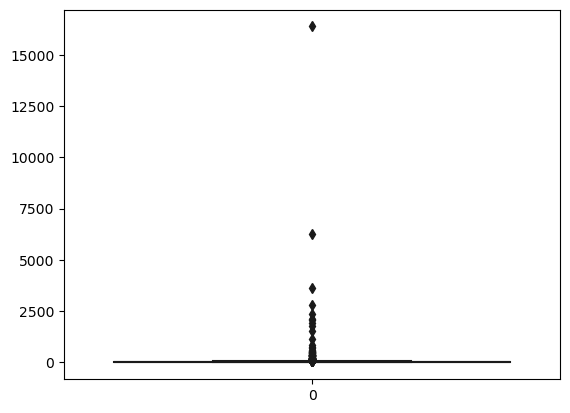

In [11]:
hashData = hashData.reset_index()
sns.boxplot(hashData["lifetimeHours"])

<Axes: xlabel='Lifetime in Hours', ylabel='Sightings'>

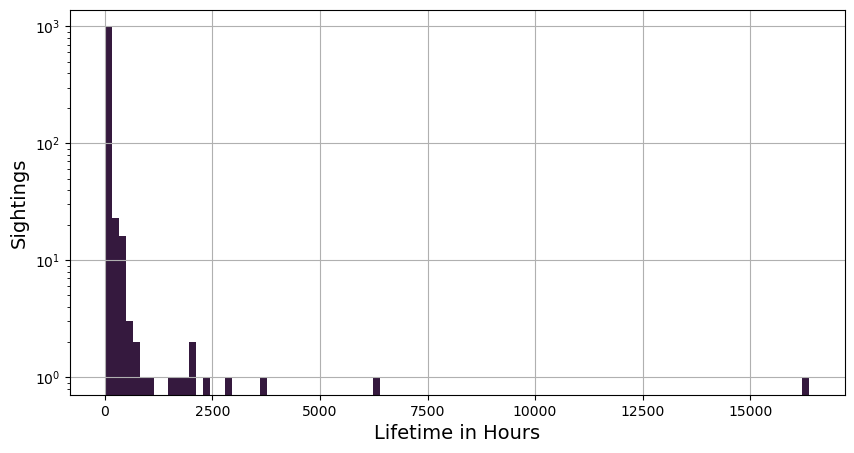

In [12]:
# Dispay as logarithmic histogram 
plt.xlabel("Lifetime in Hours", fontsize=14)
plt.ylabel("Sightings", fontsize=14)
hashData["lifetimeHours"].hist(bins=100, figsize=(10,5), log=True)
#plt.savefig("ioC_Hash.svg",bbox_inches='tight')

## Fully Dataset

In [13]:
fullData['typeCode']=fullData['ioc_type'].astype('category').cat.codes
print(fullData["typeCode"].corr(fullData["lifetimeHours"]))

-0.39577089013242733


In [14]:
# Split1 = 50/50
split1_50_train, split1_50_test = train_test_split(fullData, test_size=0.5)

# Split1 = 70/30
split2_30_train, split2_70_test = train_test_split(fullData, test_size=0.7)

# Split1 = 30/70
split3_70_train, split3_30_test = train_test_split(fullData, test_size=0.3)

In [17]:
# Display information
average = [["split1_50_train Lifetime",split1_50_train["typeCode"].corr(split1_50_train["lifetimeHours"])], 
           ["split1_50_test Lifetime",split1_50_test["typeCode"].corr(split1_50_test["lifetimeHours"])], 
           ["split2_30_train Lifetime",split2_30_train["typeCode"].corr(split2_30_train["lifetimeHours"])],
           ["split2_70_test Lifetime",split2_70_test["typeCode"].corr(split2_70_test["lifetimeHours"])], 
           ["split3_70_train Lifetime",split3_70_train["typeCode"].corr(split3_70_train["lifetimeHours"])],
            ["split3_30_test Lifetime",split3_30_test["typeCode"].corr(split3_30_test["lifetimeHours"])]]

display(HTML(
   "<table><tr>{}</tr></table>".format(
       "</tr><tr>".join(
           "<td>{}</td>".format("</td><td>".join(str(_) for _ in row)) for row in average))
))

split1_50_train Lifetime,-0.39324575729202604
split1_50_test Lifetime,-0.3982886163386536
split2_30_train Lifetime,-0.3941896242678713
split2_70_test Lifetime,-0.39644989406761916
split3_70_train Lifetime,-0.39668840373911246
split3_30_test Lifetime,-0.39364737324635285
